In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [160]:
df=pd.read_csv(r'C:\Users\OM RAJ PANDEY\Desktop\jupyter\global-power-plant-database-master\global-power-plant-database-master\source_databases_csv\database_IND.csv')

In [161]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [162]:
df.shape

(907, 27)

In [163]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Exploratory data analysis

In [165]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [166]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Above statistics data shows there are so, many outliers present in the data and also so many null columns are also present

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'other_fuel3'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'wepp_id'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:title={'center':'generation_gwh_2019'}>,
        <AxesSubplot:title={'center':'estimated_generation_gwh'}>,
        <AxesSubplot:>]], dtype=object)

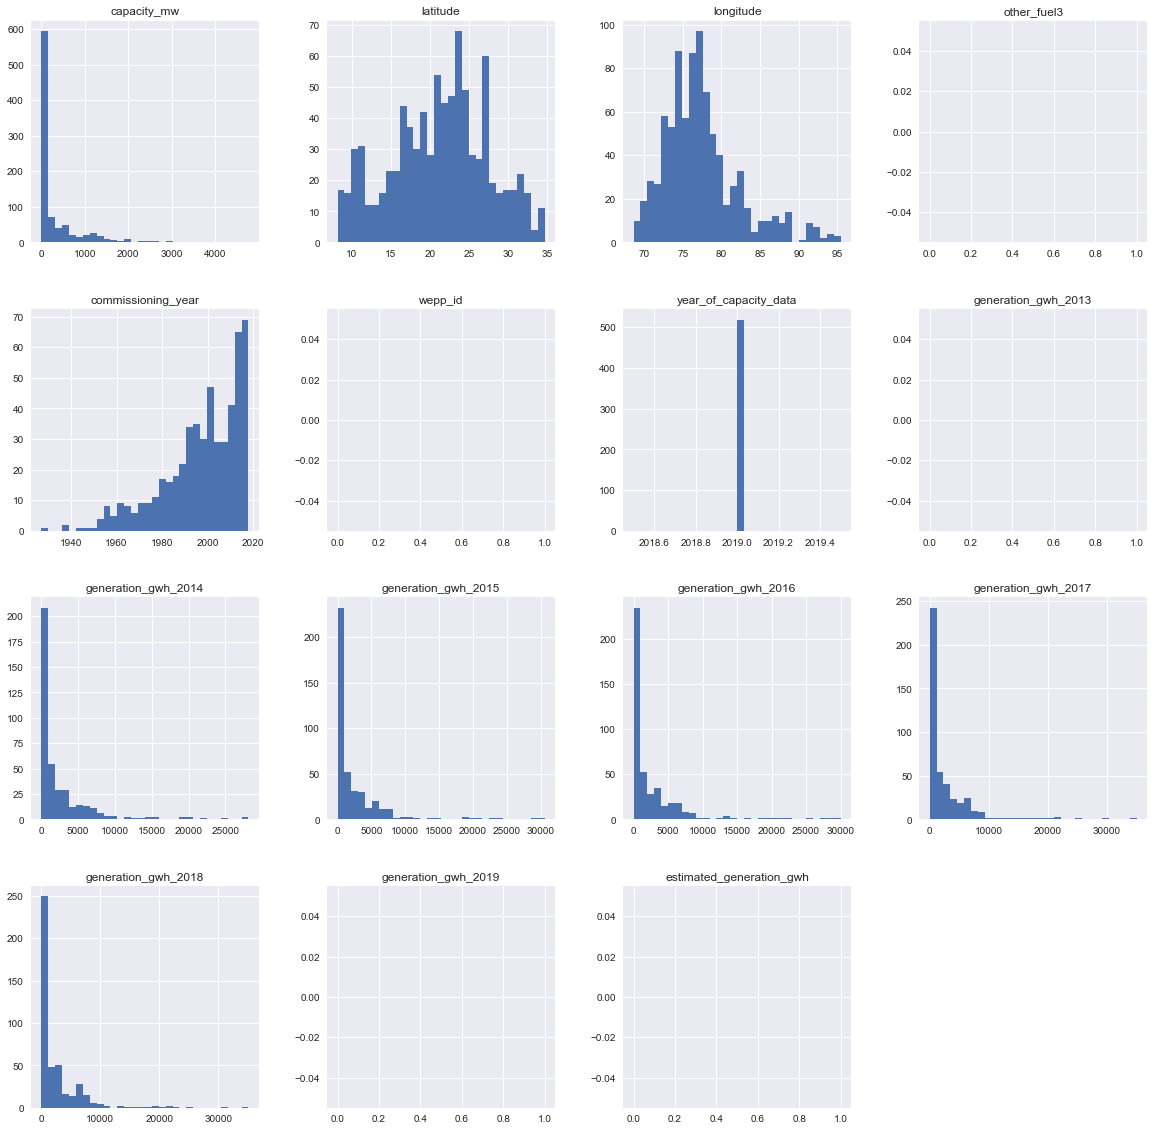

In [167]:
#plotting histogram for univariate analysis and checking the normal distribution
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

only longitude and latitude columns are normally distributed.Most of the data is left skewed.commissioning_year is right skewed.Most of the columns are over all null.

In [168]:
df.skew()

capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.067949
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         3.342707
generation_gwh_2015         3.665904
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2018         3.476298
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

In [169]:
#making the skew less then or equal to 0.55 for better prediction and plotting Normal distribution
skew=('latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
     'generation_gwh_2017','generation_gwh_2018')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

# Label Encoding

In [170]:
#convert object data types into numeric values using label encoder
label_country=LabelEncoder()
df['country']=label_country.fit_transform(df['country'])
label_country_long=LabelEncoder()
df['country_long']=label_country_long.fit_transform(df['country_long'])
label_name=LabelEncoder()
df['name']=label_name.fit_transform(df['name'])
label_gppd_idnr=LabelEncoder()
df['gppd_idnr']=label_gppd_idnr.fit_transform(df['gppd_idnr'])
label_primary_fuel=LabelEncoder()
df['primary_fuel']=label_primary_fuel.fit_transform(df['primary_fuel'])
label_other_fuel1=LabelEncoder()
df['other_fuel1']=label_other_fuel1.fit_transform(df['other_fuel1'])
label_other_fuel2=LabelEncoder()
df['other_fuel2']=label_other_fuel2.fit_transform(df['other_fuel2'])
label_owner=LabelEncoder()
df['owner']=label_owner.fit_transform(df['owner'])
label_source=LabelEncoder()
df['source']=label_source.fit_transform(df['source'])
label_url=LabelEncoder()
df['url']=label_url.fit_transform(df['url'])
label_geolocation_source=LabelEncoder()
df['geolocation_source']=label_geolocation_source.fit_transform(df['geolocation_source'])
label_generation_data_source=LabelEncoder()
df['generation_data_source']=label_generation_data_source.fit_transform(df['generation_data_source'])

In [171]:
df.shape

(907, 27)

In [172]:
from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=2)
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['latitude','longitude','other_fuel1','other_fuel2','commissioning_year',
                                             'owner','geolocation_source','year_of_capacity_data','generation_gwh_2014',
                                             'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
                                             'generation_gwh_2018','generation_data_source']]))

In [173]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,4.307313,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,4.325575,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,4.253813,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,4.525696,2,3,1,...,2019.0,NaN,6.427765,6.739037,6.787850,6.499448,6.441328,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,4.423757,1,2,1,...,2019.0,NaN,8.018477,8.685647,8.739376,8.591666,8.892886,NaN,0,NaN


In [174]:
df=df.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)

In [175]:
df.dropna()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
3,0,0,3,0,135.0,23.8712,4.525696,2,3,1,...,22,58,2,2019.0,6.427765,6.739037,6.787850,6.499448,6.441328,0
4,0,0,4,1,1800.0,21.9603,4.423757,1,2,1,...,22,58,2,2019.0,8.018477,8.685647,8.739376,8.591666,8.892886,0
5,0,0,5,2,250.0,23.7689,4.243407,1,2,1,...,22,58,2,2019.0,7.051354,7.098253,7.070524,7.046572,6.885157,0
6,0,0,6,3,60.0,10.4547,4.356809,3,3,1,...,22,58,2,2019.0,5.066122,5.031713,4.133907,4.506781,3.898475,0
7,0,0,7,4,192.0,32.2258,4.359359,3,3,1,...,22,58,2,2019.0,6.515292,6.582489,6.517264,6.522967,6.363578,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,0,882,483,400.0,30.5669,4.388838,3,3,1,...,22,58,2,2019.0,7.499899,7.094730,7.617189,7.673733,7.561829,0
889,0,0,889,485,1470.0,22.8725,4.308902,1,2,1,...,22,58,2,2019.0,8.818019,8.549184,8.172060,8.856407,8.933704,0
890,0,0,890,486,540.0,20.2727,4.381767,1,2,1,...,22,58,2,2019.0,6.953512,7.409838,7.115160,6.907925,6.847358,0
893,0,0,893,488,62.4,30.3033,4.363970,3,3,1,...,22,58,2,2019.0,5.222802,5.214936,5.324246,5.175394,5.470132,0


# Outliers:

country                      AxesSubplot(0.125,0.749828;0.133621x0.130172)
country_long              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
name                       AxesSubplot(0.44569,0.749828;0.133621x0.130172)
gppd_idnr                 AxesSubplot(0.606034,0.749828;0.133621x0.130172)
capacity_mw               AxesSubplot(0.766379,0.749828;0.133621x0.130172)
latitude                     AxesSubplot(0.125,0.593621;0.133621x0.130172)
longitude                 AxesSubplot(0.285345,0.593621;0.133621x0.130172)
primary_fuel               AxesSubplot(0.44569,0.593621;0.133621x0.130172)
other_fuel1               AxesSubplot(0.606034,0.593621;0.133621x0.130172)
other_fuel2               AxesSubplot(0.766379,0.593621;0.133621x0.130172)
commissioning_year           AxesSubplot(0.125,0.437414;0.133621x0.130172)
owner                     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
source                     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
url                      

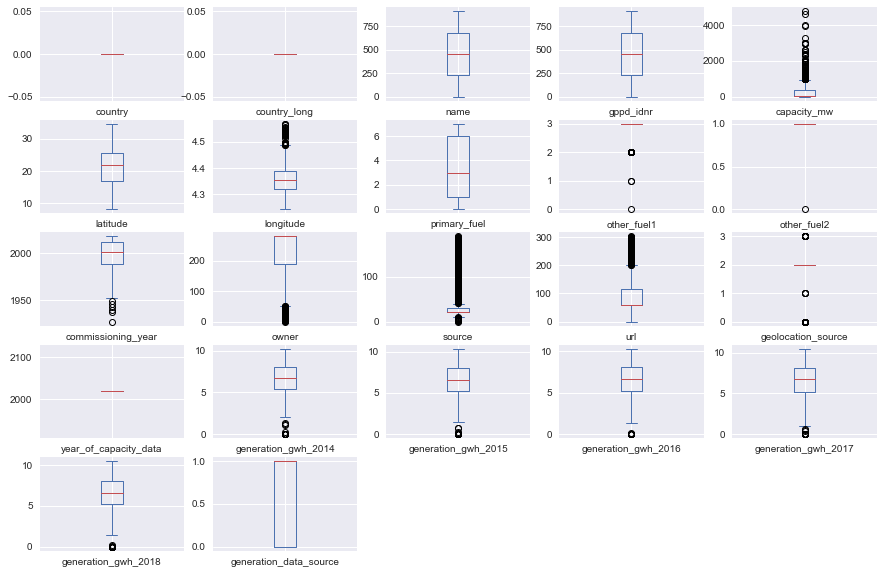

In [145]:
#plotting the box plot of each column to check the outlier
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,10))

In [176]:
#IQR
Q1=np.percentile(df[['longitude','commissioning_year','owner','source','url','generation_gwh_2014','generation_gwh_2015',
                        'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']],25,interpolation='midpoint')
Q3=np.percentile(df[['longitude','commissioning_year','owner','source','url','generation_gwh_2014','generation_gwh_2015',
                        'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']],75,interpolation='midpoint')
IQR=Q3-Q1
print("Old Shape:",df.shape)
upper=np.where(df[['longitude','commissioning_year','owner','source','url','generation_gwh_2014','generation_gwh_2015',
                        'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]>=(Q3+1.5*IQR))
lower=np.where(df[['longitude','commissioning_year','owner','source','url','generation_gwh_2014','generation_gwh_2015',
                        'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]<=(Q1-1.5*IQR))
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)
print("New Shape:",df.shape)

Old Shape: (907, 22)
New Shape: (907, 22)


In [177]:
Q1=np.percentile(df['longitude'],25,interpolation='midpoint')
Q3=np.percentile(df['longitude'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Old Shape:",df.shape)
upper=np.where(df['longitude']>=(Q3+1.5*IQR))
lower=np.where(df['longitude']<=(Q1-1.5*IQR))
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)
print("New Shape:",df.shape)

Old Shape: (907, 22)
New Shape: (907, 22)


# Prediction with capacity_mw

In [178]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [179]:
#Train/test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [180]:
knn=KNNImputer()
x_train=knn.fit_transform(x_train)
x_test=knn.transform(x_test)

In [181]:
#Import the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [182]:
#Model training
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [183]:
#prediction on test data
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)


In [184]:
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [185]:
df1

,Actual,lr,svm,rf,gr
868,187.2,589.459461,55.851930,360.72391,320.899799
439,50.4,-66.887110,46.743121,22.92500,56.166022
342,41.4,4.763430,62.185369,67.31200,117.899049
735,770.0,365.828739,57.434107,560.21760,370.882435
784,4.5,-2.062462,57.136609,11.18900,92.544604
...,...,...,...,...,...
483,4.0,76.888188,60.565887,9.55850,57.917902
634,198.0,175.658222,58.763691,105.08960,133.801799
7,192.0,501.532880,65.577431,166.49800,197.381651
817,150.0,261.629041,56.522820,349.00297,450.127655


In [186]:
#compare performance visually
import matplotlib.pyplot as plt

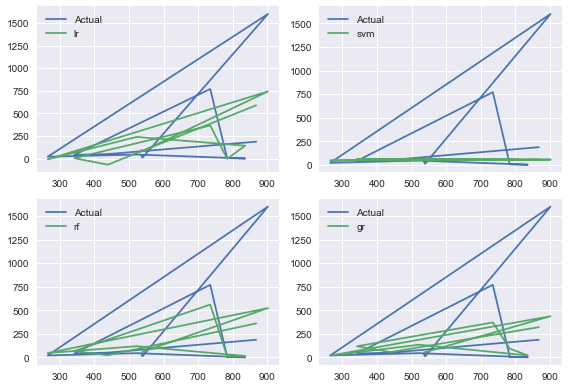

In [187]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

In [188]:
#Evaluating the Algorithm
from sklearn import metrics

In [189]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [190]:
print(score1,score2,score3,score4)

0.5143051230539255 -0.21698948845835053 0.8731457433720922 0.8433357875348468


RandomForest is our best model

In [191]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [192]:
print(s1,s2,s3,s4)

233.67043926729386 300.79472397248253 105.52765955947136 118.52146489363656


In [193]:
df.tail(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
897,0,0,897,868,34.65,8.8709,4.362418,7,3,1,...,21,227,2,NaN,NaN,NaN,NaN,NaN,NaN,1
898,0,0,898,884,42.00,27.1715,4.272319,7,3,1,...,21,212,2,NaN,NaN,NaN,NaN,NaN,NaN,1
899,0,0,899,489,600.00,30.1081,4.360876,1,2,1,...,22,58,2,2019.0,8.069455,8.218936,8.047053,8.057394,8.019830,0
900,0,0,900,633,16.00,17.1653,4.320757,0,3,1,...,189,39,2,NaN,NaN,NaN,NaN,NaN,NaN,1
901,0,0,901,490,106.60,13.1156,4.364166,5,3,1,...,22,58,2,2019.0,0.000000,0.000000,0.000000,NaN,0.000000,0
902,0,0,902,491,1600.00,16.2949,4.361273,1,2,1,...,22,58,2,2019.0,NaN,0.690581,5.457868,6.764347,6.533062,0
903,0,0,903,822,3.00,12.8932,4.371539,6,3,1,...,77,22,0,NaN,NaN,NaN,NaN,NaN,NaN,1
904,0,0,904,891,25.50,15.2758,4.338350,7,3,1,...,21,260,2,NaN,NaN,NaN,NaN,NaN,NaN,1
905,0,0,905,539,80.00,24.3500,4.314118,1,3,1,...,59,82,2,NaN,NaN,NaN,NaN,NaN,NaN,1
906,0,0,906,876,16.50,9.9344,4.362803,7,3,1,...,21,245,2,NaN,NaN,NaN,NaN,NaN,NaN,1


In [194]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [195]:
#predict the new capacity_mw
data={'country':0,'country_long':0,'name':3,'gddp_idnr':519,'latitude':24.7663,'longitude':4.3255,'primary_fuel':7,
     'other_fuel1':3,'other_fuel2':1,'commissioning_year':2011,'year_of_capacity_data':2019,'generation_gwh_2013':8.018,
     'generation_gwh_2014':6.427,'generation_gwh_2015':8.685,'generation_gwh_2016':8.739,'generation_gwh_2017':6.499,
     'generation_gwh_2018':8.892,'generation_gwh_2019':6.441,'generation_data_source':1,'estimated_generation_gwh':4.113,
     'geolocation_source':1}
df2=pd.DataFrame(data,index=[0])
df2

,country,country_long,name,gddp_idnr,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,geolocation_source
0,0,0,3,519,24.7663,4.3255,7,3,1,2011,...,8.018,6.427,8.685,8.739,6.499,8.892,6.441,1,4.113,1


In [196]:
new_pred=rf.predict(df2)
print(new_pred)

[138.077]


In [197]:
import joblib

In [198]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [199]:
model=joblib.load('model_joblib_rf')

# Prediction with primary fuel 

In [200]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [201]:
#assign the value of x and y for training and testing phase
x_c=df.drop(columns=['primary_fuel'])
y_c=df[["primary_fuel"]]
print(x_c.shape)
print(y_c.shape)

(907, 21)
(907, 1)


In [202]:
#train/test split
x_c_train,x_c_test,y_c_train,y_c_test=train_test_split(x_c,y_c,test_size=0.25,random_state=41)

In [203]:
knn=KNNImputer()
x_c_train=knn.fit_transform(x_train)
x_c_test=knn.transform(x_test)

In [207]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()

lr.fit(x_c_train, y_c_train)
dt.fit(x_c_train, y_c_train)
rf.fit(x_c_train, y_c_train)
adb.fit(x_c_train, y_c_train)

AdaBoostClassifier()

In [208]:
print("lr classification score", lr.score(x_c_train, y_c_train))
print("dt classification score", dt.score(x_c_train, y_c_train))
print("rf classification score", rf.score(x_c_train, y_c_train))
print("adb classification score", adb.score(x_c_train, y_c_train))

lr classification score 0.31029411764705883
dt classification score 1.0
rf classification score 1.0
adb classification score 0.2897058823529412


# Model Evaluation:

In [209]:
lr_ypred=lr.predict(x_c_test)
dt_ypred=dt.predict(x_c_test)
rf_ypred=rf.predict(x_c_test)
adb_ypred=adb.predict(x_c_test)

In [210]:
#Using confusion matrix in order to evaluate the model accuracy
lr_conf_mat=confusion_matrix(y_c_test, lr_ypred)
print(lr_conf_mat)

[[ 0  6  0  6  0  0  0  0]
 [ 0 50  0 22  0  0  1  0]
 [ 0 12  0  4  0  0  1  0]
 [ 0 46  0 13  0  0  1  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  8  0  1  0  0  0  0]
 [ 0 21  0  3  0  0  0  0]
 [ 0 19  0 11  0  0  0  0]]


In [211]:
dt_conf_mat=confusion_matrix(y_c_test, dt_ypred)
print(dt_conf_mat)

[[ 1  3  0  7  0  0  0  1]
 [ 8 20  2 24  2  1  9  7]
 [ 0  4  2  6  0  1  1  3]
 [ 4 14  2 13  1  2 10 14]
 [ 0  1  0  0  0  0  0  1]
 [ 1  1  1  4  0  0  0  2]
 [ 2  3  1  7  0  0  6  5]
 [ 0  9  4  7  0  1  5  4]]


In [212]:
rf_conf_mat=confusion_matrix(y_c_test, rf_ypred)
print(rf_conf_mat)

[[ 1  4  0  5  0  0  0  2]
 [ 1 37  2 22  0  0  5  6]
 [ 0  8  0  6  0  1  2  0]
 [ 0 26  1 22  0  0  8  3]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  1  6  0  0  0  1]
 [ 1  8  0 11  0  0  4  0]
 [ 0 12  3 11  0  0  3  1]]


In [213]:
adb_conf_mat=confusion_matrix(y_c_test, adb_ypred)
print(adb_conf_mat)

[[ 1  3  0  6  0  0  0  2]
 [ 8 21  0 34  0  4  0  6]
 [ 4  6  0  4  1  1  0  1]
 [ 2 20  0 28  1  5  3  1]
 [ 1  0  0  1  0  0  0  0]
 [ 0  3  0  5  0  0  0  1]
 [ 4  9  0  8  0  3  0  0]
 [ 5 11  0  9  0  3  0  2]]


# Checking classification report for each model

In [214]:
lr_report=classification_report(y_c_test, lr_ypred)
print(lr_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.30      0.68      0.42        73
           2       0.00      0.00      0.00        17
           3       0.22      0.22      0.22        60
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        30

    accuracy                           0.28       227
   macro avg       0.07      0.11      0.08       227
weighted avg       0.16      0.28      0.19       227



In [215]:
dt_report=classification_report(y_c_test, dt_ypred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       0.36      0.27      0.31        73
           2       0.17      0.12      0.14        17
           3       0.19      0.22      0.20        60
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       0.19      0.25      0.22        24
           7       0.11      0.13      0.12        30

    accuracy                           0.20       227
   macro avg       0.14      0.13      0.13       227
weighted avg       0.22      0.20      0.21       227



In [216]:
rf_report=classification_report(y_c_test, rf_ypred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.33      0.08      0.13        12
           1       0.38      0.51      0.44        73
           2       0.00      0.00      0.00        17
           3       0.26      0.37      0.31        60
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       0.18      0.17      0.17        24
           7       0.08      0.03      0.05        30

    accuracy                           0.29       227
   macro avg       0.15      0.14      0.14       227
weighted avg       0.24      0.29      0.25       227



In [217]:
adb_report=classification_report(y_c_test, adb_ypred)
print(adb_report)

              precision    recall  f1-score   support

           0       0.04      0.08      0.05        12
           1       0.29      0.29      0.29        73
           2       0.00      0.00      0.00        17
           3       0.29      0.47      0.36        60
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        24
           7       0.15      0.07      0.09        30

    accuracy                           0.23       227
   macro avg       0.10      0.11      0.10       227
weighted avg       0.19      0.23      0.20       227



# ROC AUC CURVE

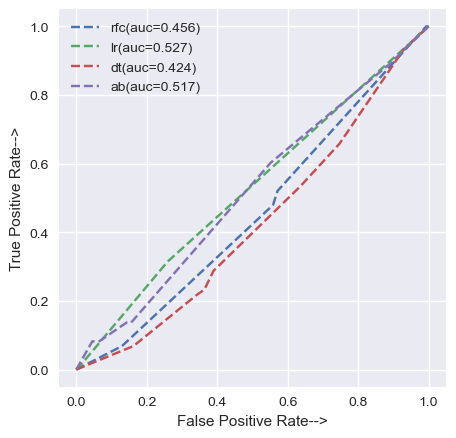

In [219]:
#plot ROC and compare AUC
from sklearn.metrics import roc_curve,auc
rfc_fpr,rfc_tpr,threshold=roc_curve(y_c_test,pred_rfc,pos_label=True)
auc_rfc=auc(rfc_fpr,rfc_tpr)
lr_fpr,lr_tpr,threshold=roc_curve(y_c_test,pred_lr,pos_label=True)
auc_lr=auc(lr_fpr,lr_tpr)
dt_fpr,dt_tpr,threshold=roc_curve(y_c_test,pred_dt,pos_label=True)
auc_dt=auc(dt_fpr,dt_tpr)
ab_fpr,ab_tpr,threshold=roc_curve(y_c_test,pred_ab,pos_label=True)
auc_ab=auc(ab_fpr,ab_tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(rfc_fpr,rfc_tpr,linestyle='dashed',label='rfc(auc=%0.3f)'%auc_rfc)
plt.plot(lr_fpr,lr_tpr,linestyle='dashed',label='lr(auc=%0.3f)'%auc_lr)
plt.plot(dt_fpr,dt_tpr,linestyle='dashed',label='dt(auc=%0.3f)'%auc_dt)
plt.plot(ab_fpr,ab_tpr,linestyle='dashed',label='ab(auc=%0.3f)'%auc_ab)
plt.xlabel('False Positive Rate-->')
plt.ylabel('True Positive Rate-->')
plt.legend()
plt.show()

here,LogisticRegression is our best model.

In [106]:
#Hyperparameter tuning
lr=LogisticRegression()

In [107]:
param_grid=[{'penalty':['l1','l2','elasticnet'],
            'C':np.logspace(-4,4,20),
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[100,1000]}]

In [108]:
clf=GridSearchCV(lr,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)

In [109]:
best_clf=clf.fit(x_c_train,y_c_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


In [110]:
best_clf.best_estimator_

LogisticRegression(C=0.00026366508987303583, penalty='l1', solver='liblinear')

In [111]:
print(f'Accuracy-:{best_clf.score(x_c_train,y_c_train):.3f}')

Accuracy-:0.281


In [115]:
#save the model
import joblib

In [116]:
joblib.dump(lr,'model_joblib_lr')

['model_joblib_lr']

In [117]:
model=joblib.load('model_joblib_lr')